In [1]:
import pandas as pd

# Load the dataset
unemployment_data = pd.read_csv('Unemployment in India.csv')

# Display the first few rows of the dataset
unemployment_data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [2]:
# Display basic information about the dataset
unemployment_data.info()

# Check for missing values
missing_values = unemployment_data.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

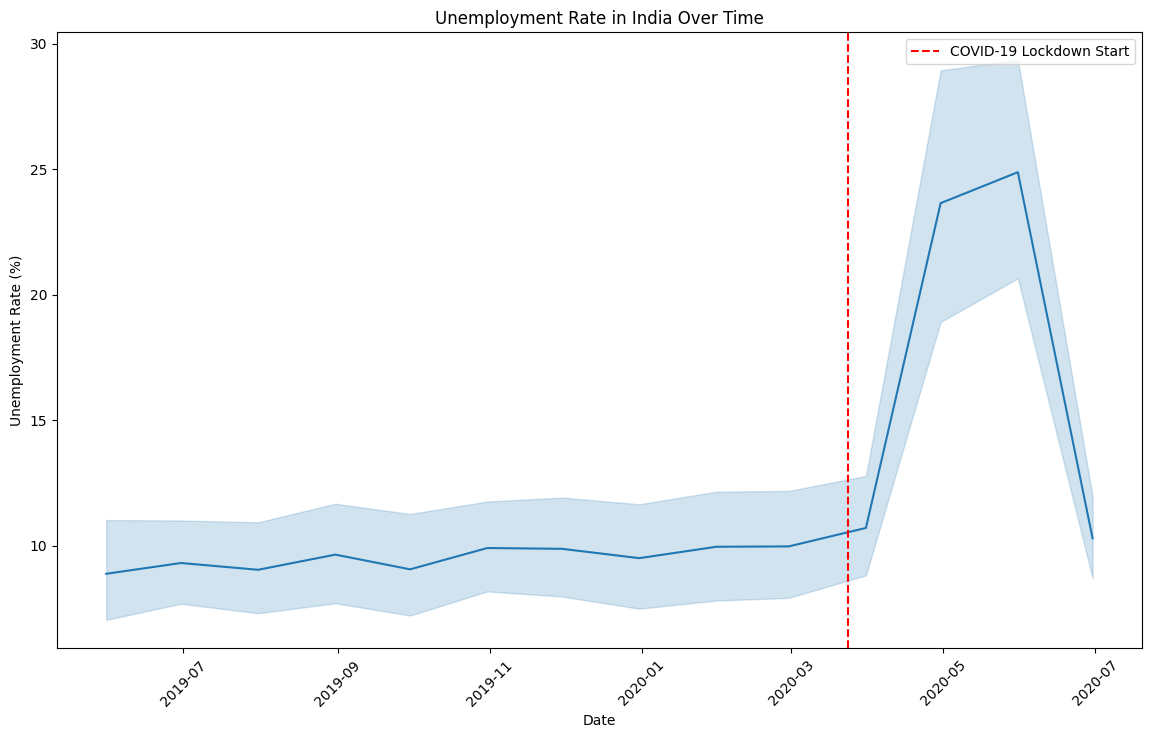

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Unemployment in India.csv'
unemployment_data = pd.read_csv(file_path)

# Strip leading/trailing spaces from column names
unemployment_data.columns = unemployment_data.columns.str.strip()

# Strip leading/trailing spaces from Date column values
unemployment_data['Date'] = unemployment_data['Date'].str.strip()

# Convert the Date column to datetime format
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], format='%d-%m-%Y')

# Handle missing values by forward filling
unemployment_data.fillna(method='ffill', inplace=True)

# Plot the overall unemployment rate over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=unemployment_data)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in India Over Time')
plt.axvline(pd.to_datetime('2020-03-24'), color='r', linestyle='--', label='COVID-19 Lockdown Start')
plt.legend()
plt.xticks(rotation=45)
plt.show()



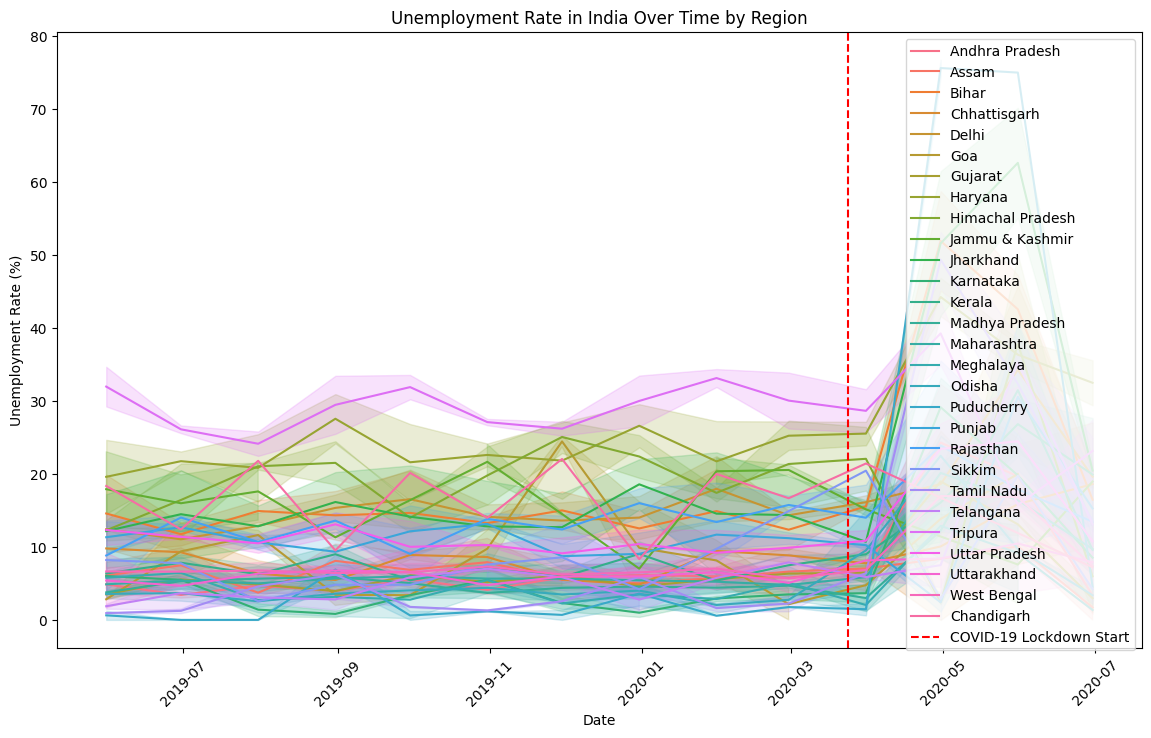

In [10]:
# Plot unemployment rate by region
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=unemployment_data)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in India Over Time by Region')
plt.axvline(pd.to_datetime('2020-03-24'), color='r', linestyle='--', label='COVID-19 Lockdown Start')
plt.legend()
plt.xticks(rotation=45)
plt.show()



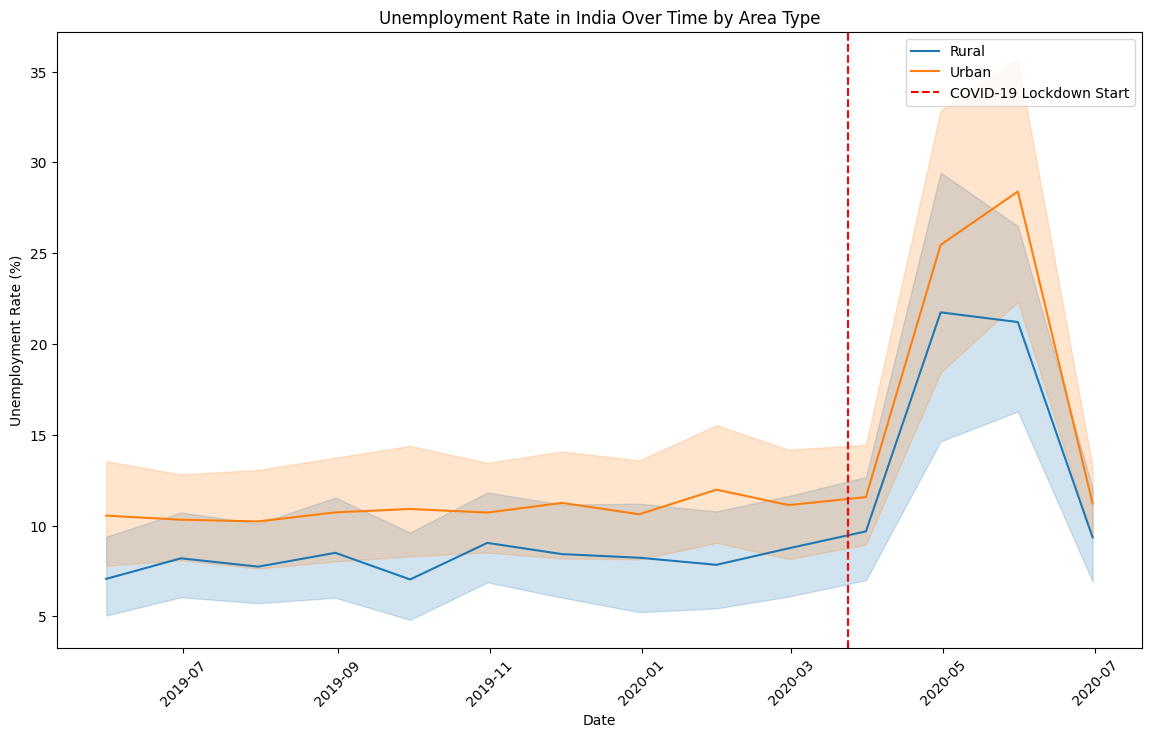

In [11]:
# Plot unemployment rate by area type (rural/urban)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Area', data=unemployment_data)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in India Over Time by Area Type')
plt.axvline(pd.to_datetime('2020-03-24'), color='r', linestyle='--', label='COVID-19 Lockdown Start')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [14]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.8 MB 454.0 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.8 MB 454.0 kB/s eta 0:00:22
    --------------------------------------- 0.1/9.8 MB 393.8 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 392.8 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 398.4 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 398.4 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 398.4 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 398.4 kB/s eta 0:00:25
   


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\prati sanghvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


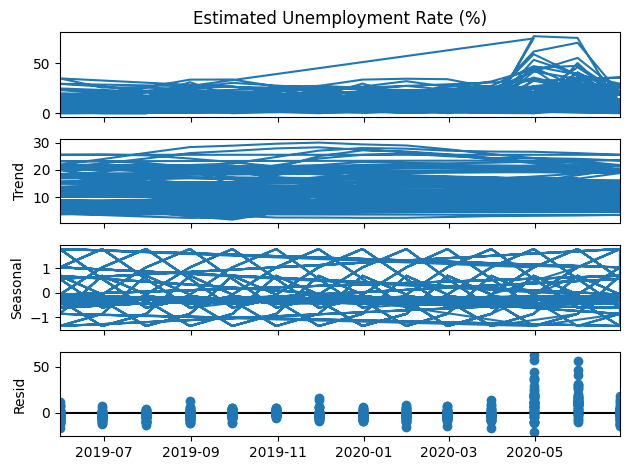

In [15]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of unemployment rate
unemployment_data.set_index('Date', inplace=True)
decompose_result = seasonal_decompose(unemployment_data['Estimated Unemployment Rate (%)'], model='additive', period=12)
decompose_result.plot()
plt.show()


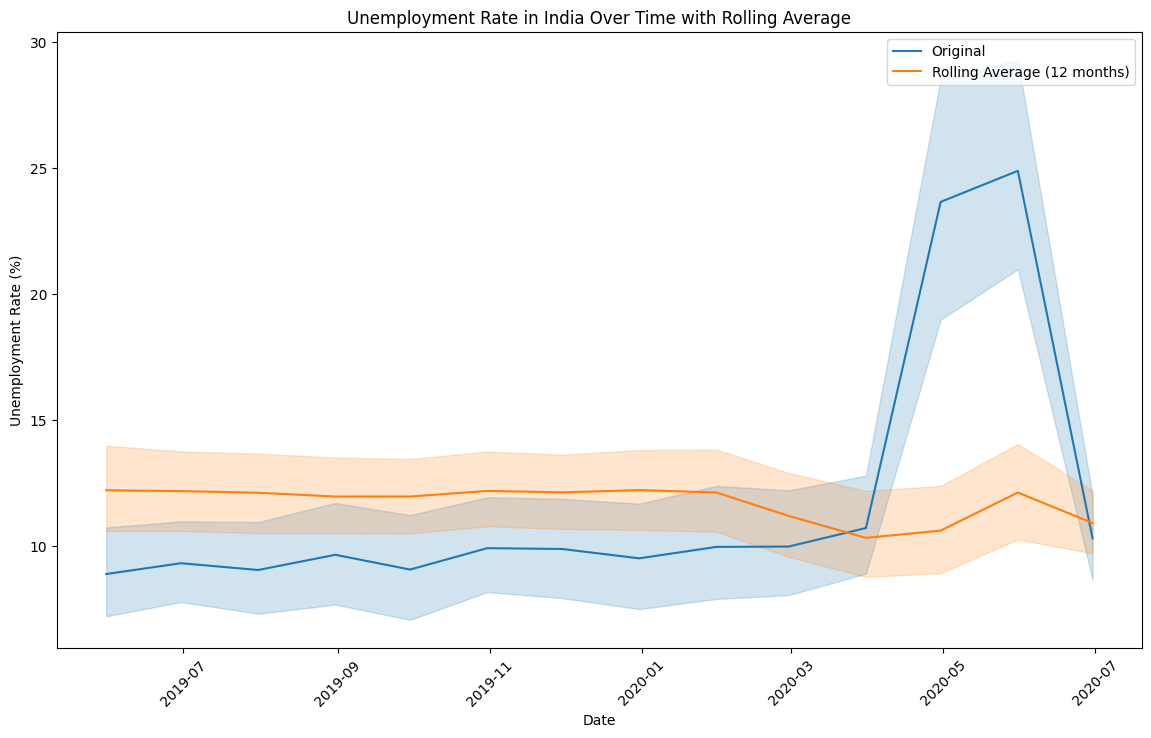

In [17]:
# Calculate rolling average
unemployment_data['Rolling Average'] = unemployment_data['Estimated Unemployment Rate (%)'].rolling(window=12).mean()

# Reset index
unemployment_data = unemployment_data.reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=unemployment_data, label='Original')
sns.lineplot(x='Date', y='Rolling Average', data=unemployment_data, label='Rolling Average (12 months)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in India Over Time with Rolling Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [18]:
# Statistical summary of unemployment rates
print(unemployment_data['Estimated Unemployment Rate (%)'].describe())


count    768.000000
mean      11.627969
std       10.566371
min        0.000000
25%        4.720000
50%        8.350000
75%       15.472500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


C:\Users\prati sanghvi\AppData\Local\Temp\ipykernel_44916\520927985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = unemployment_data.corr()


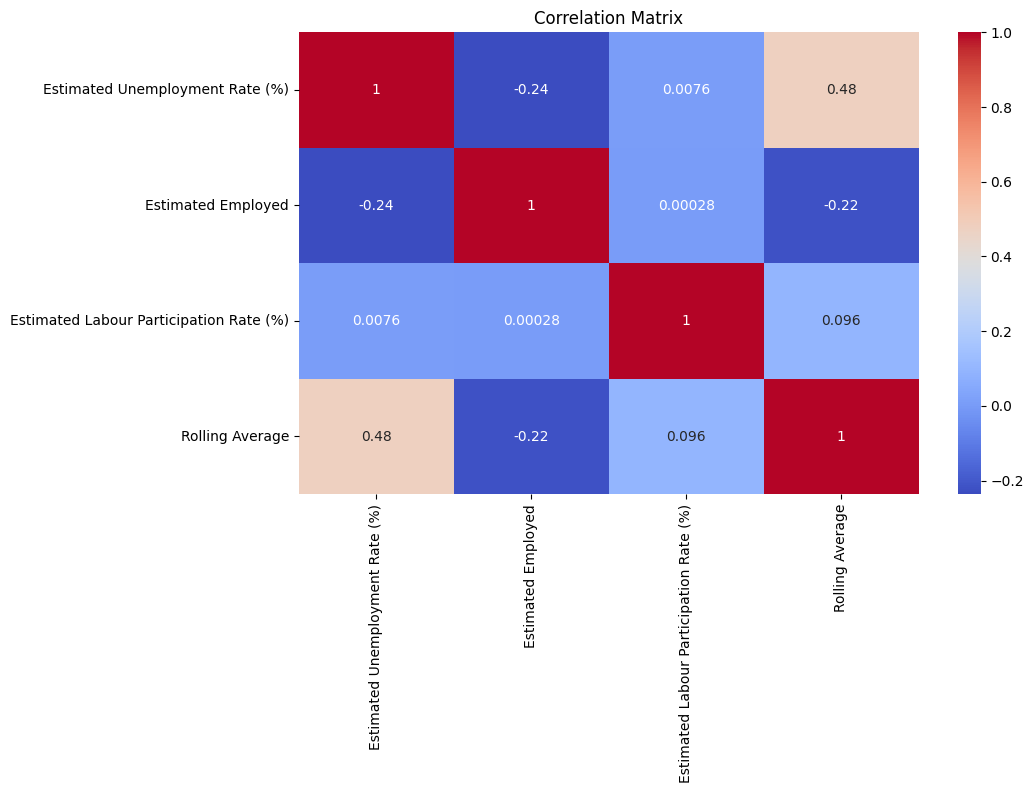

In [19]:
# Correlation analysis
correlation_matrix = unemployment_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

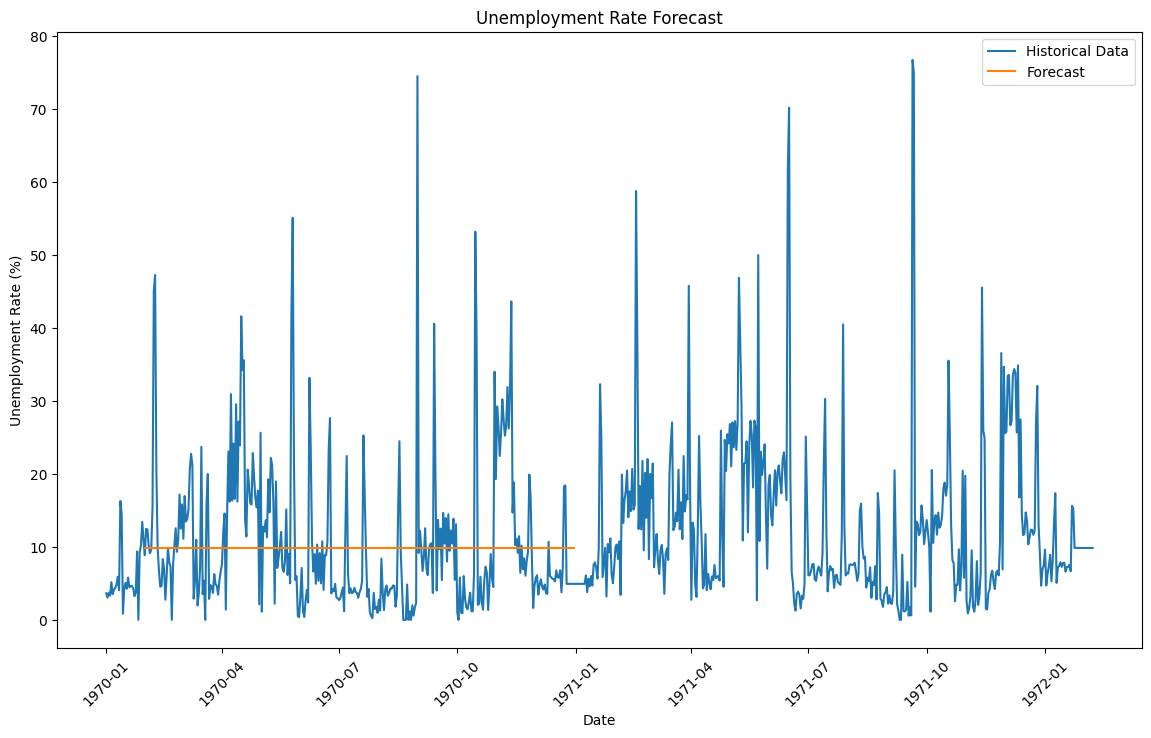

In [20]:
# Forecasting with ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(unemployment_data['Estimated Unemployment Rate (%)'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(14, 8))
plt.plot(unemployment_data.index, unemployment_data['Estimated Unemployment Rate (%)'], label='Historical Data')
plt.plot(pd.date_range(unemployment_data.index[-1], periods=12, freq='M'), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.show()